In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [5]:
T = transforms.ToTensor()
dataset = datasets.MNIST(root='../dataset',transform=T, train=True, download=False)
dataloader = torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=64,
                                        shuffle=True)

In [14]:
dataiter = iter(dataloader)
images, labels = dataiter.next()
print(torch.min(images), torch.max(images))
print(images.shape)
print(images.reshape(-1, 28*28).shape)

tensor(0.) tensor(1.)
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


In [20]:
class AutoEncoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.decoder = nn.Sequential(
            nn.Linear(28 * 28, 128), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # -> N, 3
        )
        self.encoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        decoded = self.decoder(x)
        encoded = self.encoder(decoded)
        return encoded

In [25]:
model = AutoEncoder_Linear()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
criterion = nn.MSELoss()

In [26]:
NUM_EPOCHS = 30
outputs = []
for epoch in range(NUM_EPOCHS):
    for (img, _) in dataloader:
        img = img.view(-1, 28*28)
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0480
Epoch:2, Loss:0.0442
Epoch:3, Loss:0.0413
Epoch:4, Loss:0.0430
Epoch:5, Loss:0.0375
Epoch:6, Loss:0.0404
Epoch:7, Loss:0.0381
Epoch:8, Loss:0.0362
Epoch:9, Loss:0.0356
Epoch:10, Loss:0.0401
Epoch:11, Loss:0.0350
Epoch:12, Loss:0.0370
Epoch:13, Loss:0.0389
Epoch:14, Loss:0.0401
Epoch:15, Loss:0.0289
Epoch:16, Loss:0.0307
Epoch:17, Loss:0.0341
Epoch:18, Loss:0.0336
Epoch:19, Loss:0.0325
Epoch:20, Loss:0.0304
Epoch:21, Loss:0.0308
Epoch:22, Loss:0.0356
Epoch:23, Loss:0.0344
Epoch:24, Loss:0.0369
Epoch:25, Loss:0.0336
Epoch:26, Loss:0.0334
Epoch:27, Loss:0.0297
Epoch:28, Loss:0.0317
Epoch:29, Loss:0.0292
Epoch:30, Loss:0.0344


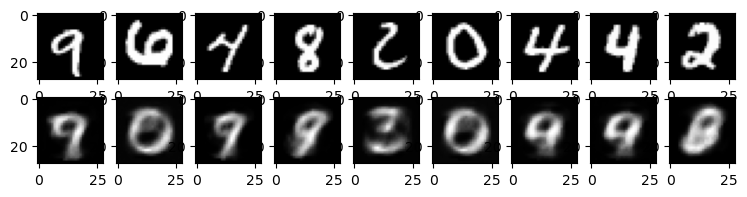

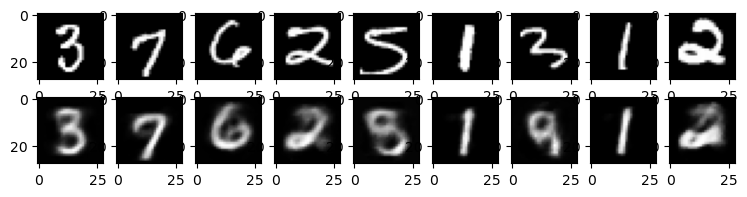

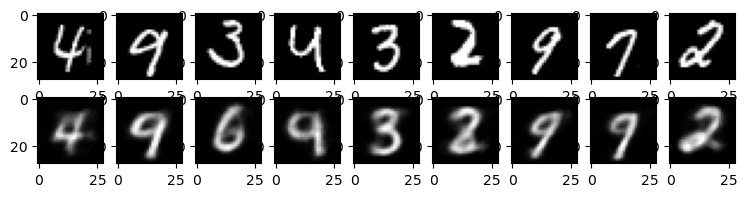

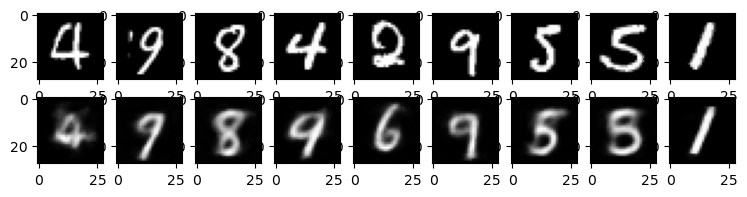

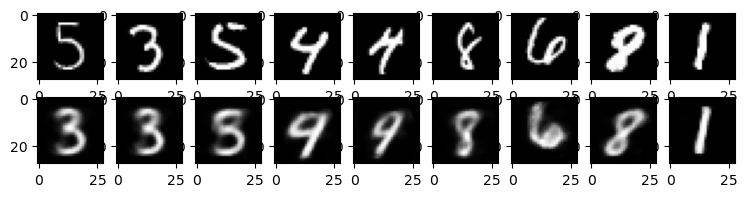

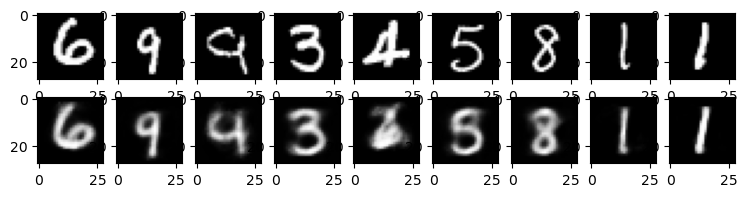

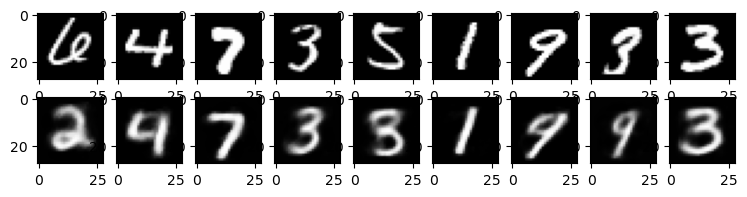

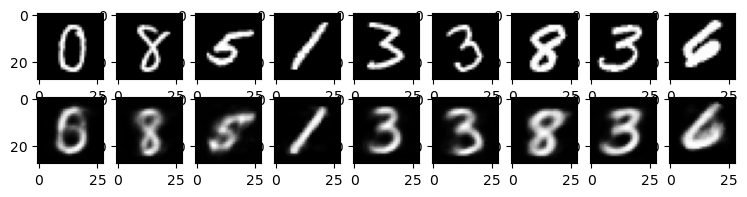

In [27]:
for k in range(0, NUM_EPOCHS, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28)
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        item = item.reshape(-1, 28,28)
        plt.imshow(item[0])